In [1]:
#Importing various python libraries for Data-Analysis
import re
import pandas as pd
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
%matplotlib inline
#from StringIO import StringIO #for Python 2
import seaborn as sb
from io import StringIO #for Python 3
import csv
import json
from pandas.io.json import json_normalize
#from flatten_json import flatten
from lxml import etree
from xml.etree import ElementTree as ET

import scipy.stats as st
import zipfile
import glob
import geocoder as gc

import time
import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


#resetting max-columns to be displayed to None.
pd.set_option('display.max_columns', None)


In [2]:
#Storing File locations  multiple Excel-Workbooks with Sales-Data
sales_files = glob.glob("Annualized_20Rolling_20Sales_20Update"+"/*.xls") #list of paths matching pathname pattern for sales data files.

#
df_sales = pd.DataFrame()

for i in range(len(sales_files)):
    df = pd.read_excel(sales_files[i],skiprows=4,converters={'BOROUGH':str, 'NEIGHBORHOOD':str, 'BUILDING CLASS CATEGORY':str,
       'TAX CLASS AT PRESENT':str, 'BLOCK':str, 'LOT':str, 'EASE-MENT':str,
       'BUILDING CLASS AT PRESENT':str, 'ADDRESS':str, 'APARTMENT NUMBER':str, 'ZIP CODE':str,
       'RESIDENTIAL UNITS':np.int64, 'COMMERCIAL UNITS':np.int64, 'TOTAL UNITS':np.int64,
       'LAND SQUARE FEET':np.int64, 'GROSS SQUARE FEET':np.int64, 'YEAR BUILT':np.int64,
       'TAX CLASS AT TIME OF SALE':str, 'BUILDING CLASS AT TIME OF SALE':str,
       'SALE PRICE':np.float64, 'SALE DATE':pd.tslib.Timestamp})
    df_sales = df_sales.append(df)


print(df_sales.dtypes)
               


BOROUGH                                   object
NEIGHBORHOOD                              object
BUILDING CLASS CATEGORY                   object
TAX CLASS AT PRESENT                      object
BLOCK                                     object
LOT                                       object
EASE-MENT                                 object
BUILDING CLASS AT PRESENT                 object
ADDRESS                                   object
APARTMENT NUMBER                          object
ZIP CODE                                  object
RESIDENTIAL UNITS                          int64
COMMERCIAL UNITS                           int64
TOTAL UNITS                                int64
LAND SQUARE FEET                           int64
GROSS SQUARE FEET                          int64
YEAR BUILT                                 int64
TAX CLASS AT TIME OF SALE                 object
BUILDING CLASS AT TIME OF SALE            object
SALE PRICE                               float64
SALE DATE           

**Data Wrangling**

In [3]:
#Reviewing Sales-Data
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,10,,C0,356 EAST 8TH STREET,,...,3,0,3,1804,2928,1899,1,C0,0.0,2012-07-09
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,,C4,715 EAST 5TH STREET,,...,20,0,20,2426,9345,1900,2,C4,3650000.0,2012-09-06
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,,C4,274 EAST SEVENTH STREET,,...,13,0,13,2726,13002,1910,2,C4,895250.0,2012-10-25
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,,C2,271 EAST 7TH STREET,,...,5,0,5,2169,3728,1900,2,C2,0.0,2012-02-16
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,387,157,,C1,619 EAST 5TH STREET,,...,40,0,40,4853,25200,1900,2,C1,10800000.0,2012-07-13


In [124]:
#Reading crime data
df_crime = pd.read_csv("NYPD_Complaint_Data_Historic.csv",dtype = {'CMPLNT_NUM' : str, 'CMPLNT_FR_DT' : pd.tslib.Timestamp, 
                        'CMPLNT_FR_TM' : pd.tslib.Timestamp, 'CMPLNT_TO_DT' : pd.tslib.Timestamp,
                        'CMPLNT_TO_TM' : pd.tslib.Timestamp, 'RPT_DT' : pd.tslib.Timestamp, 'KY_CD' : str, 
                        'OFNS_DESC' : str, 'PD_CD' : str, 'PD_DESC' : str,'CRM_ATPT_CPTD_CD' : str, 
                        'LAW_CAT_CD' : str, 'JURIS_DESC' : str, 'BORO_NM' : str,'ADDR_PCT_CD' : str, 
                        'LOC_OF_OCCUR_DESC' : str, 'PREM_TYP_DESC' : str, 'PARKS_NM' : str,'HADEVELOPT' : str, 
                        'X_COORD_CD' : str, 'Y_COORD_CD' : str, 'Latitude' : str, 'Longitude' : str,'Lat_Lon' : str})

df_crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103,OUTSIDE,NaN,NaN,NaN,1043991,193406,40.697338138,-73.784556739,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503,"CONTROLLED SUBSTANCE,INTENT TO",...,28,NaN,OTHER,NaN,NaN,999463,231690,40.802606608,-73.945051911,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,105,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183,177862,40.654549444,-73.726338791,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,13,FRONT OF,OTHER,NaN,NaN,987606,208148,40.7380024,-73.98789129,"(40.7380024, -73.98789129)"


In [6]:
#comparing data min max dates for available data
print(len(df_sales),'\n','min:',min(df_sales['SALE DATE']),'max:',max(df_sales['SALE DATE']))
print(len(df_crime),'\n','min:',min(df_crime['RPT_DT']),'max:',max(df_crime['RPT_DT']))

1254034 
 min: 2003-01-01 00:00:00 max: 2015-12-31 00:00:00
5580035 
 min: 01/01/2006 max: 12/31/2016


In [10]:
#looking for missing data values in data
print("SALE DATE: null values: \n",pd.isnull(df_sales["SALE DATE"]).value_counts())
print("CRIME DATA/RPT_DT: null values: \n",pd.isnull(df_crime["RPT_DT"]).value_counts())
print("CRIME DATA/CMPLNT_FR_DT: null values: \n",pd.isnull(df_crime["CMPLNT_FR_DT"]).value_counts())
print("CRIME DATA/CMPLNT_TO_DT: null values: \n",pd.isnull(df_crime["CMPLNT_TO_DT"]).value_counts())

SALE DATE: null values: 
 False    1254034
Name: SALE DATE, dtype: int64
CRIME DATA/RPT_DT: null values: 
 False    5580035
Name: RPT_DT, dtype: int64
CRIME DATA/CMPLNT_FR_DT: null values: 
 False    5579380
True         655
Name: CMPLNT_FR_DT, dtype: int64
CRIME DATA/CMPLNT_TO_DT: null values: 
 False    4107249
True     1472786
Name: CMPLNT_TO_DT, dtype: int64


In [125]:
#Filling missing data values
x = pd.isnull(df_crime["CMPLNT_FR_DT"])
y = pd.isnull(df_crime["CMPLNT_TO_DT"])

print("Before filling missing values:")
print(df_crime[["RPT_DT","CMPLNT_FR_DT","CMPLNT_TO_DT"]][x].head())
print(df_crime[["RPT_DT","CMPLNT_FR_DT","CMPLNT_TO_DT"]][y].head())

print("Filling missing values with corresponding row valus from RPT_DT")

df_crime["CMPLNT_FR_DT"] = df_crime["CMPLNT_FR_DT"].fillna(df_crime["RPT_DT"])
df_crime["CMPLNT_TO_DT"] = df_crime["CMPLNT_TO_DT"].fillna(df_crime["RPT_DT"])

print("After filling missing values:")
print(df_crime[["RPT_DT","CMPLNT_FR_DT","CMPLNT_TO_DT"]][x].head())
print(df_crime[["RPT_DT","CMPLNT_FR_DT","CMPLNT_TO_DT"]][y].head())


Before filling missing values:
            RPT_DT CMPLNT_FR_DT CMPLNT_TO_DT
149911  09/09/2015          NaN   09/08/2015
151388  09/08/2015          NaN          NaN
175384  08/22/2015          NaN          NaN
193200  08/10/2015          NaN          NaN
223738  07/20/2015          NaN   07/20/2015
       RPT_DT CMPLNT_FR_DT CMPLNT_TO_DT
0  12/31/2015   12/31/2015          NaN
1  12/31/2015   12/31/2015          NaN
2  12/31/2015   12/31/2015          NaN
3  12/31/2015   12/31/2015          NaN
6  12/31/2015   12/31/2015          NaN
Filling missing values with corresponding row valus from RPT_DT
After filling missing values:
            RPT_DT CMPLNT_FR_DT CMPLNT_TO_DT
149911  09/09/2015   09/09/2015   09/08/2015
151388  09/08/2015   09/08/2015   09/08/2015
175384  08/22/2015   08/22/2015   08/22/2015
193200  08/10/2015   08/10/2015   08/10/2015
223738  07/20/2015   07/20/2015   07/20/2015
       RPT_DT CMPLNT_FR_DT CMPLNT_TO_DT
0  12/31/2015   12/31/2015   12/31/2015
1  12/31/2015  

In [12]:
#verifying missing data values post corrections
print("CRIME DATA/CMPLNT_FR_DT: null values: \n",pd.isnull(df_crime["CMPLNT_FR_DT"]).value_counts())
print("CRIME DATA/CMPLNT_TO_DT: null values: \n",pd.isnull(df_crime["CMPLNT_TO_DT"]).value_counts())


CRIME DATA/CMPLNT_FR_DT: null values: 
 False    5580035
Name: CMPLNT_FR_DT, dtype: int64
CRIME DATA/CMPLNT_TO_DT: null values: 
 False    5580035
Name: CMPLNT_TO_DT, dtype: int64


In [146]:
#correcting years 1015,1016 and 1026 in 'CMPLNT_FR_DT'. it is evident from RPT date that these years are typo errors in data.
pat1 = re.compile('(?P<one>\d\d/\d\d)(?P<two>/101)(?P<three>\d)')
pat2 = re.compile('(?P<one>\d\d/\d\d)(?P<two>/102)(?P<three>\d)')

repl1 = lambda x: pat1.sub(r'\g<1>/201\g<3>',x)
repl2 = lambda x: pat2.sub(r'\g<1>/201\g<3>',x)

index1 = df_crime[df_crime['CMPLNT_FR_DT'].str.contains(pat1) == True].index
index2 = df_crime[df_crime['CMPLNT_FR_DT'].str.contains(pat2) == True].index

for i in index1:
    df_crime['CMPLNT_FR_DT'][i] = repl1(df_crime['CMPLNT_FR_DT'][i])
    
    
for i in index2:
    df_crime['CMPLNT_FR_DT'][i] = repl2(df_crime['CMPLNT_FR_DT'][i])
    


In [141]:
#validating data corrections
#df_crime[df_crime['CMPLNT_FR_DT'].str.contains(pat1) == True]
df_crime[df_crime['CMPLNT_FR_DT'].str.contains(pat2) == True]

/home/mahesh_yerra/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon


In [150]:
#data type converstion to dates-time
df_crime['CMPLNT_FR_DT'] = pd.to_datetime(df_crime['CMPLNT_FR_DT'])
df_crime['CMPLNT_TO_DT'] = pd.to_datetime(df_crime['CMPLNT_TO_DT'])
df_crime['RPT_DT'] = pd.to_datetime(df_crime['RPT_DT'])

In [151]:
df_crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,2015-12-31,23:45:00,2015-12-31,NaN,2015-12-31,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)"
1,153401121,2015-12-31,23:36:00,2015-12-31,NaN,2015-12-31,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103,OUTSIDE,NaN,NaN,NaN,1043991,193406,40.697338138,-73.784556739,"(40.697338138, -73.784556739)"
2,569369778,2015-12-31,23:30:00,2015-12-31,NaN,2015-12-31,117,DANGEROUS DRUGS,503,"CONTROLLED SUBSTANCE,INTENT TO",...,28,NaN,OTHER,NaN,NaN,999463,231690,40.802606608,-73.945051911,"(40.802606608, -73.945051911)"
3,968417082,2015-12-31,23:30:00,2015-12-31,NaN,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,105,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183,177862,40.654549444,-73.726338791,"(40.654549444, -73.726338791)"
4,641637920,2015-12-31,23:25:00,2015-12-31,23:30:00,2015-12-31,344,ASSAULT 3 & RELATED OFFENSES,101,ASSAULT 3,...,13,FRONT OF,OTHER,NaN,NaN,987606,208148,40.7380024,-73.98789129,"(40.7380024, -73.98789129)"


In [152]:
#Since, crime_data does not have zip code information, 
#constructing data frame of lat_lon with crime count for each lat_lon coordinates
geo_codes = df_crime.Lat_Lon.value_counts()
geo_codes_zip = pd.DataFrame({'crime_count':geo_codes.values, 'lat_lon':geo_codes.index})
geo_codes_zip.head()

,crime_count,lat_lon
0,18363,"(40.750430768, -73.989282176)"
1,6429,"(40.791151867, -73.884371919)"
2,6171,"(40.710093847, -74.01060963)"
3,5002,"(40.756266207, -73.990501248)"
4,4988,"(40.733926841, -73.871582398)"


In [153]:
geo_codes_zip['zip'] = '0' #adding new column for zip-code
geo_codes_zip.head()

,crime_count,lat_lon,zip
0,18363,"(40.750430768, -73.989282176)",0
1,6429,"(40.791151867, -73.884371919)",0
2,6171,"(40.710093847, -74.01060963)",0
3,5002,"(40.756266207, -73.990501248)",0
4,4988,"(40.733926841, -73.871582398)",0


In [158]:
#Challenge:cannot extract reverse geocoding from google API for more than 100,000 records in a day
#work around: breaking geo_codes_zip dataframe into smaller data frames
#This is a very long process, as the open-source interfaces time-out every 10 minutes.

geo_codes_zip_1 = geo_codes_zip[0:90000]
geo_codes_zip_2 = geo_codes_zip[90000:]

print('geo_codes_zip1:',len(geo_codes_zip_1))
print('geo_codes_zip2:',len(geo_codes_zip_2))

geo_codes_zip1: 90000
geo_codes_zip2: 23885


In [96]:
#writing the data into local folders
geo_codes_zip_1.to_csv('geo_codes_1.csv')
geo_codes_zip_2.to_csv('geo_codes_2.csv')

In [628]:
geo_index = geo_codes_zip_1[(geo_codes_zip_1.zip == '0') | (pd.notnull(geo_codes_zip_1.zip) == False) ].index
#We used alternate APIs after every timeout to balance the load and to fasten the geo-coding process.
'''
#using google API for for extracting zip codes
for i in geo_index:
    zip_code = gc.google(geo_codes_zip_1.lat_lon[i],method='reverse').postal
    geo_codes_zip_1.zip[i] = zip_code
'''

#using OSM(Open Street Maps) API for for extracting zip codes
for i in geo_index:
    zip_code = gc.osm(geo_codes_zip_1.lat_lon[i],method='reverse').postal
    geo_codes_zip_1.zip[i] = zip_code

geo_codes_zip_1.to_csv('geo_codes_zip_1.csv')

geocoded_index = geo_codes_zip_1[(geo_codes_zip_1.zip != '0') & (pd.notnull(geo_codes_zip_1.zip)) ].index

/home/mahesh_yerra/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/mahesh_yerra/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [630]:
#geo_codes_zip_1.iloc[geo_index,]
#Reviewing Geo-coded data after each timeout
geo_codes_zip_1.iloc[geocoded_index,]

,crime_count,lat_lon,zip
0,18363,"(40.750430768, -73.989282176)",10001
1,6429,"(40.791151867, -73.884371919)",11370
2,6171,"(40.710093847, -74.01060963)",10007
3,5002,"(40.756266207, -73.990501248)",10018
4,4988,"(40.733926841, -73.871582398)",11373
5,4984,"(40.804384046, -73.937421669)",10035
6,4615,"(40.610717129, -73.920985283)",11234
7,4604,"(40.651698159, -73.868446756)",11239
8,4450,"(40.684461543, -73.97775121)",11217
9,4449,"(40.749121191, -73.986167723)",10001


In [ ]:
#Reverse geo-coding 2nd set of lat-long data
geo_index = geo_codes_zip_2[(geo_codes_zip_2.zip == '0') | (pd.notnull(geo_codes_zip_2.zip) == False) ].index

#using google API for for extracting zip codes
for i in geo_index:
    zip_code = gc.google(geo_codes_zip_2.lat_lon[i],method='reverse').postal
    geo_codes_zip_2.zip[i] = zip_code

'''
#using OSM(Open Street Maps) API for for extracting zip codes
for i in geo_index:
    zip_code = gc.osm(geo_codes_zip_2.lat_lon[i],method='reverse').postal
    geo_codes_zip_1.zip[i] = zip_code
'''
geo_codes_zip_2.to_csv('geo_codes_zip_2.csv')


geocoded_index = geo_codes_zip_2[(geo_codes_zip_2.zip != '0') & (pd.notnull(geo_codes_zip_2.zip)) ].index

In [ ]:
geo_codes_zip_2.iloc[geo_index,]
geo_codes_zip_2.iloc[geocoded_index,]

In [170]:
#reading saved zip_code files back from local drive
geo_codes_zip_1 = pd.read_csv('geo_codes_zip_1.csv',usecols=[0,1,2,3],index_col=0)
geo_codes_zip_1.head()

,crime_count,lat_lon,zip
0,18363,"(40.750430768, -73.989282176)",10001
1,6429,"(40.791151867, -73.884371919)",11370
2,6171,"(40.710093847, -74.01060963)",10007
3,5002,"(40.756266207, -73.990501248)",10018
4,4988,"(40.733926841, -73.871582398)",11373


In [171]:
geo_codes_zip_2 = pd.read_csv('geo_codes_zip_2.csv',usecols=[0,1,2,3],index_col=0)
geo_codes_zip_2.head()

,crime_count,lat_lon,zip
90000,4,"(40.615018575, -73.910246639)",11234
90001,4,"(40.709622031, -73.993122948)",7307
90002,4,"(40.716792507, -73.880345234)",11379
90003,4,"(40.727756904, -73.811878927)",11367
90004,4,"(40.703542344, -74.007409493)",10005


In [176]:
#appending 2 zip_code datasets
geo_codes_zip = geo_codes_zip_1.append(geo_codes_zip_2)
len(geo_codes_zip)

113885

In [184]:
#truncating crime_count from zip_code file as this count is Lat_Lon level but not at zip_code level.
#zip_code level crime count will be calculated from crime data for different past-time intervals from sale-date.
geo_codes_zip.columns = ['crime_count','Lat_Lon','zip_code']
geo_codes_zip = geo_codes_zip[['Lat_Lon','zip_code']]
geo_codes_zip.head()

,Lat_Lon,zip_code
0,"(40.750430768, -73.989282176)",10001
1,"(40.791151867, -73.884371919)",11370
2,"(40.710093847, -74.01060963)",10007
3,"(40.756266207, -73.990501248)",10018
4,"(40.733926841, -73.871582398)",11373


In [186]:
#merging zip_codes with crime data on to a temp file
temp = pd.merge(df_crime,geo_codes_zip, on = 'Lat_Lon')
temp.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,zip_code
0,101109527,2015-12-31,23:45:00,2015-12-31,NaN,2015-12-31,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)",10456
1,163896203,2015-11-12,23:00:00,2015-11-13,NaN,2015-11-13,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)",10456
2,938500214,2015-09-23,18:30:00,2015-09-23,19:00:00,2015-09-24,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)",10456
3,861343822,2015-08-31,12:00:00,2015-08-31,13:00:00,2015-09-04,344,ASSAULT 3 & RELATED OFFENSES,114,OBSTR BREATH/CIRCUL,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)",10456
4,375862763,2015-08-09,04:00:00,2015-08-09,NaN,2015-08-09,106,FELONY ASSAULT,109,"ASSAULT 2,1,UNCLASSIFIED",...,INSIDE,STREET,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)",10456


In [189]:
#assigining crime data with zip codes to original crime file.
df_crime = temp
df_crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,zip_code
0,101109527,2015-12-31,23:45:00,2015-12-31,NaN,2015-12-31,113,FORGERY,729,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)",10456
1,163896203,2015-11-12,23:00:00,2015-11-13,NaN,2015-11-13,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)",10456
2,938500214,2015-09-23,18:30:00,2015-09-23,19:00:00,2015-09-24,361,OFF. AGNST PUB ORD SENSBLTY &,639,AGGRAVATED HARASSMENT 2,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)",10456
3,861343822,2015-08-31,12:00:00,2015-08-31,13:00:00,2015-09-04,344,ASSAULT 3 & RELATED OFFENSES,114,OBSTR BREATH/CIRCUL,...,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)",10456
4,375862763,2015-08-09,04:00:00,2015-08-09,NaN,2015-08-09,106,FELONY ASSAULT,109,"ASSAULT 2,1,UNCLASSIFIED",...,INSIDE,STREET,NaN,NaN,1007314,241257,40.828848333,-73.916661142,"(40.828848333, -73.916661142)",10456


In [190]:
#writing dataframe to csv file in a local folder to save computational efforts in future
df_crime.to_csv('df_crime.csv',index = False)

In [191]:
#writing dataframe to csv file in a local folder to save computations in future
df_sales.to_csv('df_sales.csv',index = False)

In [2]:
#Next step: calculate number of crime-incidents reported for each zip-code in Sale-Data.
df_crime = pd.read_csv('df_crime.csv')
df_crime.head()

/home/mahesh_yerra/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,zip_code
0,101109527,2015-12-31,23:45:00,2015-12-31,NaN,2015-12-31,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314,241257,40.828848,-73.916661,"(40.828848333, -73.916661142)",10456
1,163896203,2015-11-12,23:00:00,2015-11-13,NaN,2015-11-13,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1007314,241257,40.828848,-73.916661,"(40.828848333, -73.916661142)",10456
2,938500214,2015-09-23,18:30:00,2015-09-23,19:00:00,2015-09-24,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,AGGRAVATED HARASSMENT 2,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1007314,241257,40.828848,-73.916661,"(40.828848333, -73.916661142)",10456
3,861343822,2015-08-31,12:00:00,2015-08-31,13:00:00,2015-09-04,344,ASSAULT 3 & RELATED OFFENSES,114.0,OBSTR BREATH/CIRCUL,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1007314,241257,40.828848,-73.916661,"(40.828848333, -73.916661142)",10456
4,375862763,2015-08-09,04:00:00,2015-08-09,NaN,2015-08-09,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",COMPLETED,FELONY,N.Y. POLICE DEPT,BRONX,44.0,INSIDE,STREET,NaN,NaN,1007314,241257,40.828848,-73.916661,"(40.828848333, -73.916661142)",10456


In [4]:
df_sales = pd.read_csv('df_sales.csv')
df_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,03 THREE FAMILY HOMES,1,377,10,,C0,356 EAST 8TH STREET,,10009,3,0,3,1804,2928,1899,1,C0,0.0,2012-07-09
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,375,62,,C4,715 EAST 5TH STREET,,10009,20,0,20,2426,9345,1900,2,C4,3650000.0,2012-09-06
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376,30,,C4,274 EAST SEVENTH STREET,,10009,13,0,13,2726,13002,1910,2,C4,895250.0,2012-10-25
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,377,52,,C2,271 EAST 7TH STREET,,10009,5,0,5,2169,3728,1900,2,C2,0.0,2012-02-16
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,387,157,,C1,619 EAST 5TH STREET,,10009,40,0,40,4853,25200,1900,2,C1,10800000.0,2012-07-13


In [65]:
#Filtering invalid data records
temp_sales = df_sales.copy()
temp_sales = temp_sales[(temp_sales['SALE PRICE']!=0)&(temp_sales['YEAR BUILT']!=0)&(temp_sales['LAND SQUARE FEET']!=0)&(temp_sales['LAND SQUARE FEET'] <= temp_sales['GROSS SQUARE FEET'])]
temp_sales.shape


(177494, 21)

In [66]:
#sampling for Data Analysis
temp_sales_sample = temp_sales.sample(n=8000,random_state=9001)
temp_sales_sample = temp_sales_sample.reset_index(drop = True)
temp_sales_sample.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,3,FLATBUSH-NORTH,03 THREE FAMILY DWELLINGS,1,4662,16,,C0,50 EAST 57TH STREET,,11203,3,0,3,2500,4050,1920,1,C0,477500.0,2013-04-19
1,4,COLLEGE POINT,02 TWO FAMILY HOMES,1,4004,140,,B2,11-15 127TH STREET,,11356,2,0,2,1966,3075,2005,1,B2,757944.0,2007-05-11
2,3,BUSHWICK,02 TWO FAMILY HOMES,1,3283,56,,B2,1051 GREENE AVENUE,,11221,2,0,2,1871,1904,1920,1,B2,389500.0,2004-12-02
3,3,EAST NEW YORK,14 RENTALS - 4-10 UNIT,2A,3741,18,,S3,2158 PITKIN AVENUE,3,11207,3,1,4,2000,3300,1930,2,S3,650000.0,2006-03-15
4,3,CYPRESS HILLS,02 TWO FAMILY HOMES,1,3916,113,,B2,50 NORWOOD AVENUE,,11208,2,0,2,2000,2208,1910,1,B2,625000.0,2006-11-01


In [67]:
#Sorting Crime-data to ease query operations
df_crime = df_crime.sort_values(by = ["zip_code","RPT_DT"])
df_crime.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,JURIS_DESC,BORO_NM,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,zip_code
2358019,915446372,2006-06-21,18:45:00,2006-06-21,18:48:00,2006-06-21,351,CRIMINAL MISCHIEF & RELATED OF,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,22.0,NaN,STREET,NaN,NaN,994537,224035,40.781603,-73.962856,"(40.781602803, -73.962856404)",83
4570980,588543586,2006-06-29,00:08:00,2006-06-29,NaN,2006-06-29,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,22.0,NaN,PARK/PLAYGROUND,NaN,NaN,993329,225084,40.784483,-73.967217,"(40.784483353, -73.967216921)",83
2358018,364789382,2006-07-06,04:40:00,2006-07-06,NaN,2006-07-06,351,CRIMINAL MISCHIEF & RELATED OF,254.0,"MISCHIEF, CRIMINAL 4, OF MOTOR",COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,22.0,NaN,PARK/PLAYGROUND,NaN,NaN,994537,224035,40.781603,-73.962856,"(40.781602803, -73.962856404)",83
4570979,156162567,2006-07-07,17:10:00,2006-07-07,17:20:00,2006-07-07,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",COMPLETED,FELONY,N.Y. POLICE DEPT,MANHATTAN,22.0,NaN,PARK/PLAYGROUND,NaN,NaN,993329,225084,40.784483,-73.967217,"(40.784483353, -73.967216921)",83
2358017,424037443,2006-07-11,18:05:00,2006-07-11,18:06:00,2006-07-11,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,COMPLETED,MISDEMEANOR,N.Y. POLICE DEPT,MANHATTAN,22.0,NaN,PARK/PLAYGROUND,NaN,NaN,994537,224035,40.781603,-73.962856,"(40.781602803, -73.962856404)",83


In [24]:
#Functions for calculating crime count for each zip code for different time-intervals in the past.

def past_crime_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code as of given date.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['RPT_DT']< date)])
    return x

def past6M_crime_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 6 months from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(6,'M')))])
    return x

def past1Y_crime_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 1 Year from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(1,'Y')))])
    return x

def past2Y_crime_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 2 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(2,'Y')))])
    return x

def past3Y_crime_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 3 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(3,'Y')))])
    return x

def past4Y_crime_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 4 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(4,'Y')))])
    return x


def past5Y_crime_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 5 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(5,'Y')))])
    return x



In [ ]:
#Function calls to calculate crime data
print('\nStart Time: ',datetime.datetime.now())

temp_sales_sample['past_crime_count'] = temp_sales_sample.apply(lambda row: past_crime_count(row['SALE DATE'],row['ZIP CODE']),axis=1)
temp_sales_sample.to_csv('sales_data.csv',index = False)
print('\n: past_crime_count calculated : Time: ',datetime.datetime.now())

temp_sales_sample['past5Y_crime_count'] = temp_sales_sample.apply(lambda row: past5Y_crime_count(row['SALE DATE'],row['ZIP CODE']),axis=1)
temp_sales_sample.to_csv('sales_data.csv',index = False)
print('\n: past5Y_crime_count calculated : Time: ',datetime.datetime.now())

temp_sales_sample['past2Y_crime_count'] = temp_sales_sample.apply(lambda row: past2Y_crime_count(row['SALE DATE'],row['ZIP CODE']),axis=1)
temp_sales_sample.to_csv('sales_data.csv',index = False)
print('\n: past2Y_crime_count calculated : Time: ',datetime.datetime.now())

temp_sales_sample['past6M_crime_count'] = temp_sales_sample.apply(lambda row: past6M_crime_count(row['SALE DATE'],row['ZIP CODE']),axis=1)
temp_sales_sample.to_csv('sales_data.csv',index = False)
print('\n: past6M_crime_count calculated : Time: ',datetime.datetime.now())

temp_sales_sample['past1Y_crime_count'] = temp_sales_sample.apply(lambda row: past1Y_crime_count(row['SALE DATE'],row['ZIP CODE']),axis=1)
temp_sales_sample.to_csv('sales_data.csv',index = False)
print('\n: past1Y_crime_count calculated : Time: ',datetime.datetime.now())


temp_sales_sample['past3Y_crime_count'] = temp_sales_sample.apply(lambda row: past3Y_crime_count(row['SALE DATE'],row['ZIP CODE']),axis=1)
temp_sales_sample.to_csv('sales_data.csv',index = False)
print('\n: past3Y_crime_count calculated : Time: ',datetime.datetime.now())

temp_sales_sample['past4Y_crime_count'] sales_data= temp_sales_sample.apply(lambda row: past4Y_crime_count(row['SALE DATE'],row['ZIP CODE']),axis=1)
temp_sales_sample.to_csv('sales_data.csv',index = False)
print('\n: past4Y_crime_count calculated : Time: ',datetime.datetime.now())



Start Time:  2017-11-14 00:38:36.986667

: past_crime_count calculated : Time:  2017-11-14 04:13:58.621872

: past5Y_crime_count calculated : Time:  2017-11-14 12:21:50.034283


In [4]:
#Functions for calculating crime types count for each zip code for different time-intervals in the past.

def past_MISDEMEANOR_count(date,zip_code):
    '''
    This function calculates the number of past MISDEMEANOR crimes from crime database
    reported at a given zip_code as of given date.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['RPT_DT']< date) & (df_crime['LAW_CAT_CD'] == 'MISDEMEANOR')])
    return x

def past_FELONY_count(date,zip_code):
    '''
    This function calculates the number of past FELONY crimes from crime database
    reported at a given zip_code as of given date.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['RPT_DT']< date) & (df_crime['LAW_CAT_CD'] == 'FELONY')])
    return x

def past_VIOLATION_count(date,zip_code):
    '''
    This function calculates the number of past VIOLATION crimes from crime database
    reported at a given zip_code as of given date.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['RPT_DT']< date) & (df_crime['LAW_CAT_CD'] == 'VIOLATION')])
    return x

def past6M_MISDEMEANOR_count(date,zip_code):
    '''
    This function calculates the number of past MISDEMEANOR crimes from crime database
    reported at a given zip_code in past 6 months from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'MISDEMEANOR') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(6,'M')))])
    return x

def past6M_FELONY_count(date,zip_code):
    '''
    This function calculates the number of past FELONY crimes from crime database
    reported at a given zip_code in past 6 months from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'FELONY') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(6,'M')))])
    return x

def past6M_VIOLATION_count(date,zip_code):
    '''
    This function calculates the number of past VIOLATION crimes from crime database
    reported at a given zip_code in past 6 months from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'VIOLATION') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(6,'M')))])
    return x

def past1Y_MISDEMEANOR_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 1 Year from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'MISDEMEANOR') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(1,'Y')))])
    return x

def past1Y_FELONY_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 1 Year from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'FELONY') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(1,'Y')))])
    return x

def past1Y_VIOLATION_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 1 Year from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'VIOLATION') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(1,'Y')))])
    return x

def past2Y_MISDEMEANOR_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 2 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'MISDEMEANOR') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(2,'Y')))])
    return x

def past2Y_FELONY_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 2 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'FELONY') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(2,'Y')))])
    return x

def past2Y_VIOLATION_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 2 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'VIOLATION') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(2,'Y')))])
    return x

def past3Y_MISDEMEANOR_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 3 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'MISDEMEANOR') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(3,'Y')))])
    return x

def past3Y_FELONY_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 3 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'FELONY') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(3,'Y')))])
    return x

def past3Y_VIOLATION_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 3 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'VIOLATION') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(3,'Y')))])
    return x

def past4Y_MISDEMEANOR_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 4 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'MISDEMEANOR') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(4,'Y')))])
    return x

def past4Y_FELONY_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 4 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'FELONY') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(4,'Y')))])
    return x

def past4Y_VIOLATION_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 4 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'VIOLATION') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(4,'Y')))])
    return x

def past5Y_MISDEMEANOR_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 5 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'MISDEMEANOR') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(5,'Y')))])
    return x

def past5Y_FELONY_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 5 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'FELONY') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(5,'Y')))])
    return x

def past5Y_VIOLATION_count(date,zip_code):
    '''
    This function calculates the number of past crimes from crime database
    reported at a given zip_code in past 5 Years from Sale_date of property.
    '''
    x = len(df_crime[(df_crime['zip_code'] == zip_code) & (df_crime['LAW_CAT_CD'] == 'VIOLATION') & 
                     ((df_crime['RPT_DT']< date)&(pd.to_datetime(df_crime['RPT_DT'])> pd.to_datetime(date)-np.timedelta64(5,'Y')))])
    return x



In [38]:
#Function calls to calculate past MISDEMEANOR crime counts for each sale sample
print('\nStart Time: ',datetime.datetime.now())

df_sales_sample['past_MISDEMEANOR_count'] = df_sales_sample.apply(lambda row: past_MISDEMEANOR_count(row['SALE DATE'],row['ZIP CODE']),axis=1)
df_sales_sample.to_csv('df_sales_sample_2.csv',index = False)
print('\n: past_MISDEMEANOR_count calculated : Time: ',datetime.datetime.now())
df_sales_sample.head()



Start Time:  2017-11-16 22:47:27.978542

: past_MISDEMEANOR_count calculated : Time:  2017-11-17 03:50:09.911678


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,past_crime_count,past5Y_crime_count,past2Y_crime_count,past6M_crime_count,past1Y_crime_count,past3Y_crime_count,past_MISDEMEANOR_count
0,3,FLATBUSH-NORTH,03 THREE FAMILY DWELLINGS,1,4662,16,,C0,50 EAST 57TH STREET,,11203,3,0,3,2500,4050,1920,1,C0,477500.0,2013-04-19,21147,14219,5699,1345,2892,8588,11213
1,4,COLLEGE POINT,02 TWO FAMILY HOMES,1,4004,140,,B2,11-15 127TH STREET,,11356,2,0,2,1966,3075,2005,1,B2,757944.0,2007-05-11,683,683,683,240,478,683,402
2,3,BUSHWICK,02 TWO FAMILY HOMES,1,3283,56,,B2,1051 GREENE AVENUE,,11221,2,0,2,1871,1904,1920,1,B2,389500.0,2004-12-02,0,0,0,0,0,0,0
3,3,EAST NEW YORK,14 RENTALS - 4-10 UNIT,2A,3741,18,,S3,2158 PITKIN AVENUE,3,11207,3,1,4,2000,3300,1930,2,S3,650000.0,2006-03-15,1157,1157,1157,1157,1157,1157,612
4,3,CYPRESS HILLS,02 TWO FAMILY HOMES,1,3916,113,,B2,50 NORWOOD AVENUE,,11208,2,0,2,2000,2208,1910,1,B2,625000.0,2006-11-01,3717,3717,3717,2199,3717,3717,2089


In [9]:
#Function calls to calculate past FELONY crime counts for each sale sample
print('\nStart Time: ',datetime.datetime.now())

df_sales_sample['past_FELONY_count'] = df_sales_sample.apply(lambda row: past_FELONY_count(row['SALE DATE'],row['ZIP CODE']),axis=1)
df_sales_sample.to_csv('df_sales_sample_2.csv',index = False)
print('\n: past_FELONY_count calculated : Time: ',datetime.datetime.now())
df_sales_sample.head()


Start Time:  2017-11-19 11:21:18.676403

: past_FELONY_count calculated : Time:  2017-11-19 16:14:22.352457


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,past_crime_count,past5Y_crime_count,past2Y_crime_count,past6M_crime_count,past1Y_crime_count,past3Y_crime_count,past_MISDEMEANOR_count,past_FELONY_count
0,3,FLATBUSH-NORTH,03 THREE FAMILY DWELLINGS,1,4662,16,,C0,50 EAST 57TH STREET,,11203,3,0,3,2500,4050,1920,1,C0,477500.0,2013-04-19,21147,14219,5699,1345,2892,8588,11213,7451
1,4,COLLEGE POINT,02 TWO FAMILY HOMES,1,4004,140,,B2,11-15 127TH STREET,,11356,2,0,2,1966,3075,2005,1,B2,757944.0,2007-05-11,683,683,683,240,478,683,402,210
2,3,BUSHWICK,02 TWO FAMILY HOMES,1,3283,56,,B2,1051 GREENE AVENUE,,11221,2,0,2,1871,1904,1920,1,B2,389500.0,2004-12-02,0,0,0,0,0,0,0,0
3,3,EAST NEW YORK,14 RENTALS - 4-10 UNIT,2A,3741,18,,S3,2158 PITKIN AVENUE,3,11207,3,1,4,2000,3300,1930,2,S3,650000.0,2006-03-15,1157,1157,1157,1157,1157,1157,612,379
4,3,CYPRESS HILLS,02 TWO FAMILY HOMES,1,3916,113,,B2,50 NORWOOD AVENUE,,11208,2,0,2,2000,2208,1910,1,B2,625000.0,2006-11-01,3717,3717,3717,2199,3717,3717,2089,1166


In [5]:
#Function calls to calculate past VIOLATION crime counts for each sale sample
print('\nStart Time: ',datetime.datetime.now())

df_sales_sample['past_VIOLATION_count'] = df_sales_sample.apply(lambda row: past_VIOLATION_count(row['SALE DATE'],row['ZIP CODE']),axis=1)
df_sales_sample.to_csv('df_sales_sample_2.csv',index = False)
print('\n: past_VIOLATION_count calculated : Time: ',datetime.datetime.now())
df_sales_sample.head()


Start Time:  2017-11-19 23:46:15.631868

: past_VIOLATION_count calculated : Time:  2017-11-20 03:24:41.195802


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,past_crime_count,past5Y_crime_count,past2Y_crime_count,past6M_crime_count,past1Y_crime_count,past3Y_crime_count,past_MISDEMEANOR_count,past_FELONY_count,past_VIOLATION_count
0,3,FLATBUSH-NORTH,03 THREE FAMILY DWELLINGS,1,4662,16,,C0,50 EAST 57TH STREET,,11203,3,0,3,2500,4050,1920,1,C0,477500.0,2013-04-19,21147,14219,5699,1345,2892,8588,11213,7451,2483
1,4,COLLEGE POINT,02 TWO FAMILY HOMES,1,4004,140,,B2,11-15 127TH STREET,,11356,2,0,2,1966,3075,2005,1,B2,757944.0,2007-05-11,683,683,683,240,478,683,402,210,71
2,3,BUSHWICK,02 TWO FAMILY HOMES,1,3283,56,,B2,1051 GREENE AVENUE,,11221,2,0,2,1871,1904,1920,1,B2,389500.0,2004-12-02,0,0,0,0,0,0,0,0,0
3,3,EAST NEW YORK,14 RENTALS - 4-10 UNIT,2A,3741,18,,S3,2158 PITKIN AVENUE,3,11207,3,1,4,2000,3300,1930,2,S3,650000.0,2006-03-15,1157,1157,1157,1157,1157,1157,612,379,166
4,3,CYPRESS HILLS,02 TWO FAMILY HOMES,1,3916,113,,B2,50 NORWOOD AVENUE,,11208,2,0,2,2000,2208,1910,1,B2,625000.0,2006-11-01,3717,3717,3717,2199,3717,3717,2089,1166,462


**Exploratory Data Analysis**

In [2]:
#Reading cleaned sample file from local folder.
df_sales_sample = pd.read_csv('df_sales_sample_2.csv')
df_sales_sample.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,past_crime_count,past5Y_crime_count,past2Y_crime_count,past6M_crime_count,past1Y_crime_count,past3Y_crime_count,past_MISDEMEANOR_count,past_FELONY_count,past_VIOLATION_count
0,3,FLATBUSH-NORTH,03 THREE FAMILY DWELLINGS,1,4662,16,,C0,50 EAST 57TH STREET,,11203,3,0,3,2500,4050,1920,1,C0,477500.0,2013-04-19,21147,14219,5699,1345,2892,8588,11213,7451,2483
1,4,COLLEGE POINT,02 TWO FAMILY HOMES,1,4004,140,,B2,11-15 127TH STREET,,11356,2,0,2,1966,3075,2005,1,B2,757944.0,2007-05-11,683,683,683,240,478,683,402,210,71
2,3,BUSHWICK,02 TWO FAMILY HOMES,1,3283,56,,B2,1051 GREENE AVENUE,,11221,2,0,2,1871,1904,1920,1,B2,389500.0,2004-12-02,0,0,0,0,0,0,0,0,0
3,3,EAST NEW YORK,14 RENTALS - 4-10 UNIT,2A,3741,18,,S3,2158 PITKIN AVENUE,3,11207,3,1,4,2000,3300,1930,2,S3,650000.0,2006-03-15,1157,1157,1157,1157,1157,1157,612,379,166
4,3,CYPRESS HILLS,02 TWO FAMILY HOMES,1,3916,113,,B2,50 NORWOOD AVENUE,,11208,2,0,2,2000,2208,1910,1,B2,625000.0,2006-11-01,3717,3717,3717,2199,3717,3717,2089,1166,462


In [10]:
#Reviewing Sales-Price
df_sales_sample["SALE PRICE"].describe()

count    8.000000e+03
mean     2.652798e+06
std      3.595869e+07
min      1.000000e+00
25%      3.250000e+05
50%      5.450000e+05
75%      8.500000e+05
max      1.791829e+09
Name: SALE PRICE, dtype: float64

In [3]:
#converting date values to epoch time to make it as continuous variable for Data-Analysis.
sample_data = df_sales_sample.loc[:,['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY','TAX CLASS AT PRESENT', 'BLOCK', 'LOT','BUILDING CLASS AT PRESENT', 'ZIP CODE','RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS','LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
                                    'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE','SALE PRICE', 'SALE DATE', 'past_crime_count', 'past5Y_crime_count','past2Y_crime_count', 'past6M_crime_count', 'past1Y_crime_count','past3Y_crime_count', 'past_MISDEMEANOR_count', 
                                    'past_FELONY_count', 'past_VIOLATION_count']].copy()
sample_data["SALE DATE"] = sample_data["SALE DATE"].apply(lambda x:(time.mktime(pd.datetime.strptime(x, "%Y-%m-%d").timetuple())))
sample_data = sample_data[(sample_data['SALE PRICE']!=0)&(sample_data['YEAR BUILT']!=0)&(sample_data['GROSS SQUARE FEET']!=0)]
sample_data.shape


(8000, 27)

In [6]:
sample_data['TAX CLASS AT TIME OF SALE'].value_counts()

C0    1409
B1    1031
A5     579
B2     531
H2     462
B3     450
C3     383
B9     337
C2     334
C1     307
S2     285
C7     138
D1     110
A9      98
V0      97
S9      96
A1      87
S1      86
S3      74
A4      66
C5      57
C4      55
K9      52
S5      52
O9      51
H3      47
S4      44
K4      43
K2      42
D4      38
      ... 
H6       2
I6       2
N9       2
L2       1
Z0       1
D2       1
A3       1
J4       1
J9       1
D0       1
M2       1
C9       1
T2       1
I7       1
W8       1
M4       1
M3       1
I4       1
W3       1
G5       1
W4       1
Z3       1
R4       1
A0       1
G8       1
J1       1
R9       1
W2       1
V2       1
J5       1
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64

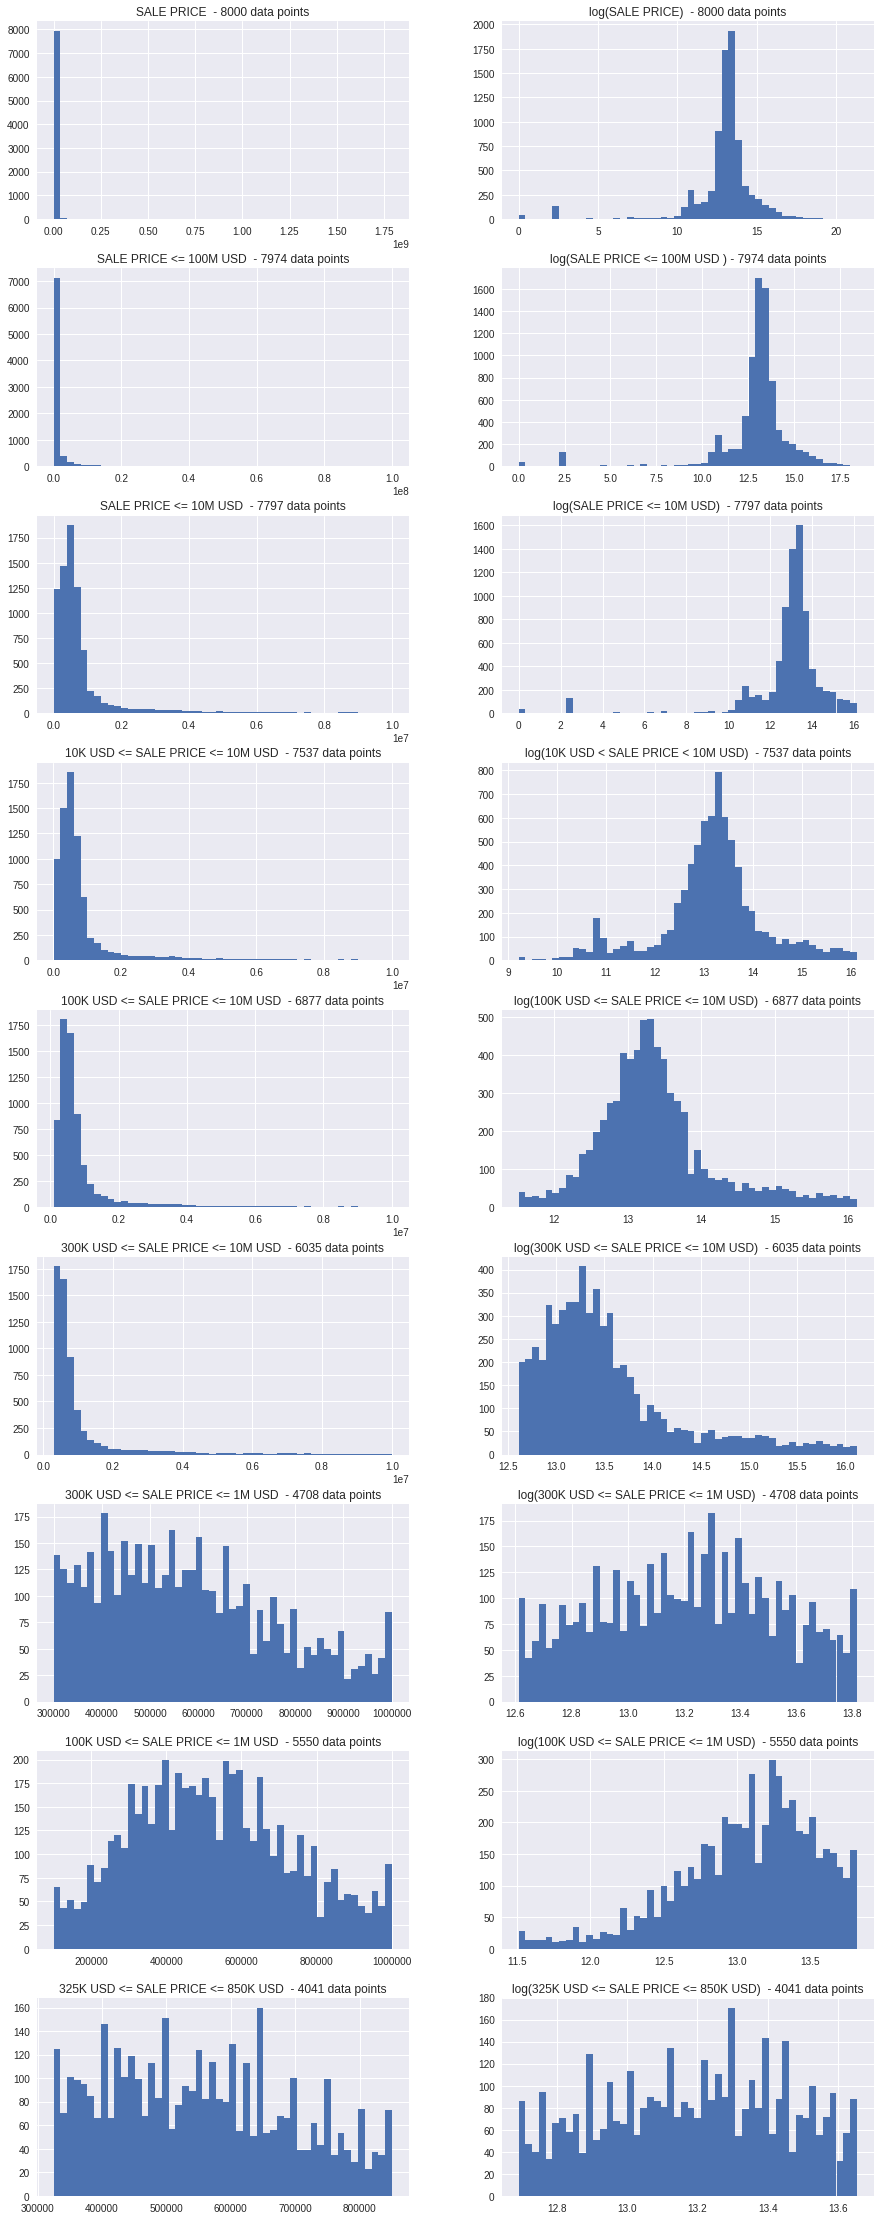

In [14]:
#histogram of target variable
temp = sample_data["SALE PRICE"].copy()
fig, ax = plt.subplots(9,2,figsize=(15,40))

ax[0,0].hist(temp,bins = 50)
ax[0,0].set_title("SALE PRICE  - {} data points".format(temp.shape[0]))

ax[0,1].hist(np.log(temp),bins = 50)
ax[0,1].set_title("log(SALE PRICE)  - {} data points".format(temp.shape[0]))

ax[1,0].hist(temp[temp <= 1e8],bins = 50)
ax[1,0].set_title("SALE PRICE <= 100M USD  - {} data points".format(temp[temp <= 1e8].shape[0]))

ax[1,1].hist(np.log(temp[temp <= 1e8]),bins = 50)
ax[1,1].set_title("log(SALE PRICE <= 100M USD ) - {} data points".format(temp[temp <= 1e8].shape[0]))

ax[2,0].hist(temp[temp <= 1e7],bins = 50)
ax[2,0].set_title("SALE PRICE <= 10M USD  - {} data points".format(temp[temp <= 1e7].shape[0]))

ax[2,1].hist(np.log(temp[temp <= 1e7]),bins = 50)
ax[2,1].set_title("log(SALE PRICE <= 10M USD)  - {} data points".format(temp[temp <= 1e7].shape[0]))

ax[3,0].hist(temp[(temp >= 1e4) & (temp <= 1e7)],bins = 50)
ax[3,0].set_title("10K USD <= SALE PRICE <= 10M USD  - {} data points".format(temp[(temp >= 1e4) & (temp <= 1e7)].shape[0]))

ax[3,1].hist(np.log(temp[(temp >= 1e4) & (temp <= 1e7)]),bins = 50)
ax[3,1].set_title("log(10K USD < SALE PRICE < 10M USD)  - {} data points".format(temp[(temp >= 1e4) & (temp <= 1e7)].shape[0]))

ax[4,0].hist(temp[(temp >= 1e5) & (temp <= 1e7)],bins = 50)
ax[4,0].set_title("100K USD <= SALE PRICE <= 10M USD  - {} data points".format(temp[(temp >= 1e5) & (temp <= 1e7)].shape[0]))

ax[4,1].hist(np.log(temp[(temp >= 1e5) & (temp <= 1e7)]),bins = 50)
ax[4,1].set_title("log(100K USD <= SALE PRICE <= 10M USD)  - {} data points".format(temp[(temp >= 1e5) & (temp <= 1e7)].shape[0]))

ax[5,0].hist(temp[(temp >= 3e5) & (temp <= 1e7)],bins = 50)
ax[5,0].set_title("300K USD <= SALE PRICE <= 10M USD  - {} data points".format(temp[(temp >= 3e5) & (temp <= 1e7)].shape[0]))

ax[5,1].hist(np.log(temp[(temp >= 3e5) & (temp <= 1e7)]),bins = 50)
ax[5,1].set_title("log(300K USD <= SALE PRICE <= 10M USD)  - {} data points".format(temp[(temp >= 3e5) & (temp <= 1e7)].shape[0]))

ax[6,0].hist(temp[(temp >= 3e5) & (temp <= 1e6)],bins = 50)
ax[6,0].set_title("300K USD <= SALE PRICE <= 1M USD  - {} data points".format(temp[(temp >= 3e5) & (temp <= 1e6)].shape[0]))

ax[6,1].hist(np.log(temp[(temp >= 3e5) & (temp <= 1e6)]),bins = 50)
ax[6,1].set_title("log(300K USD <= SALE PRICE <= 1M USD)  - {} data points".format(temp[(temp >= 3e5) & (temp <= 1e6)].shape[0]))

ax[7,0].hist(temp[(temp >= 1e5) & (temp <= 1e6)],bins = 50)
ax[7,0].set_title("100K USD <= SALE PRICE <= 1M USD  - {} data points".format(temp[(temp >= 1e5) & (temp <= 1e6)].shape[0]))

ax[7,1].hist(np.log(temp[(temp >= 1e5) & (temp <= 1e6)]),bins = 50)
ax[7,1].set_title("log(100K USD <= SALE PRICE <= 1M USD)  - {} data points".format(temp[(temp >= 1e5) & (temp <= 1e6)].shape[0]))

ax[8,0].hist(temp[(temp >= 3.25e5) & (temp <= 8.5e5)],bins = 50)
ax[8,0].set_title("325K USD <= SALE PRICE <= 850K USD  - {} data points".format(temp[(temp >= 3.25e5) & (temp <= 8.5e5)].shape[0]))

ax[8,1].hist(np.log(temp[(temp >= 3.25e5) & (temp <= 8.5e5)]),bins = 50)
ax[8,1].set_title("log(325K USD <= SALE PRICE <= 850K USD)  - {} data points".format(temp[(temp >= 3.25e5) & (temp <= 8.5e5)].shape[0]))

plt.subplots_adjust(wspace= 0.25, hspace = 0.25)
plt.show()



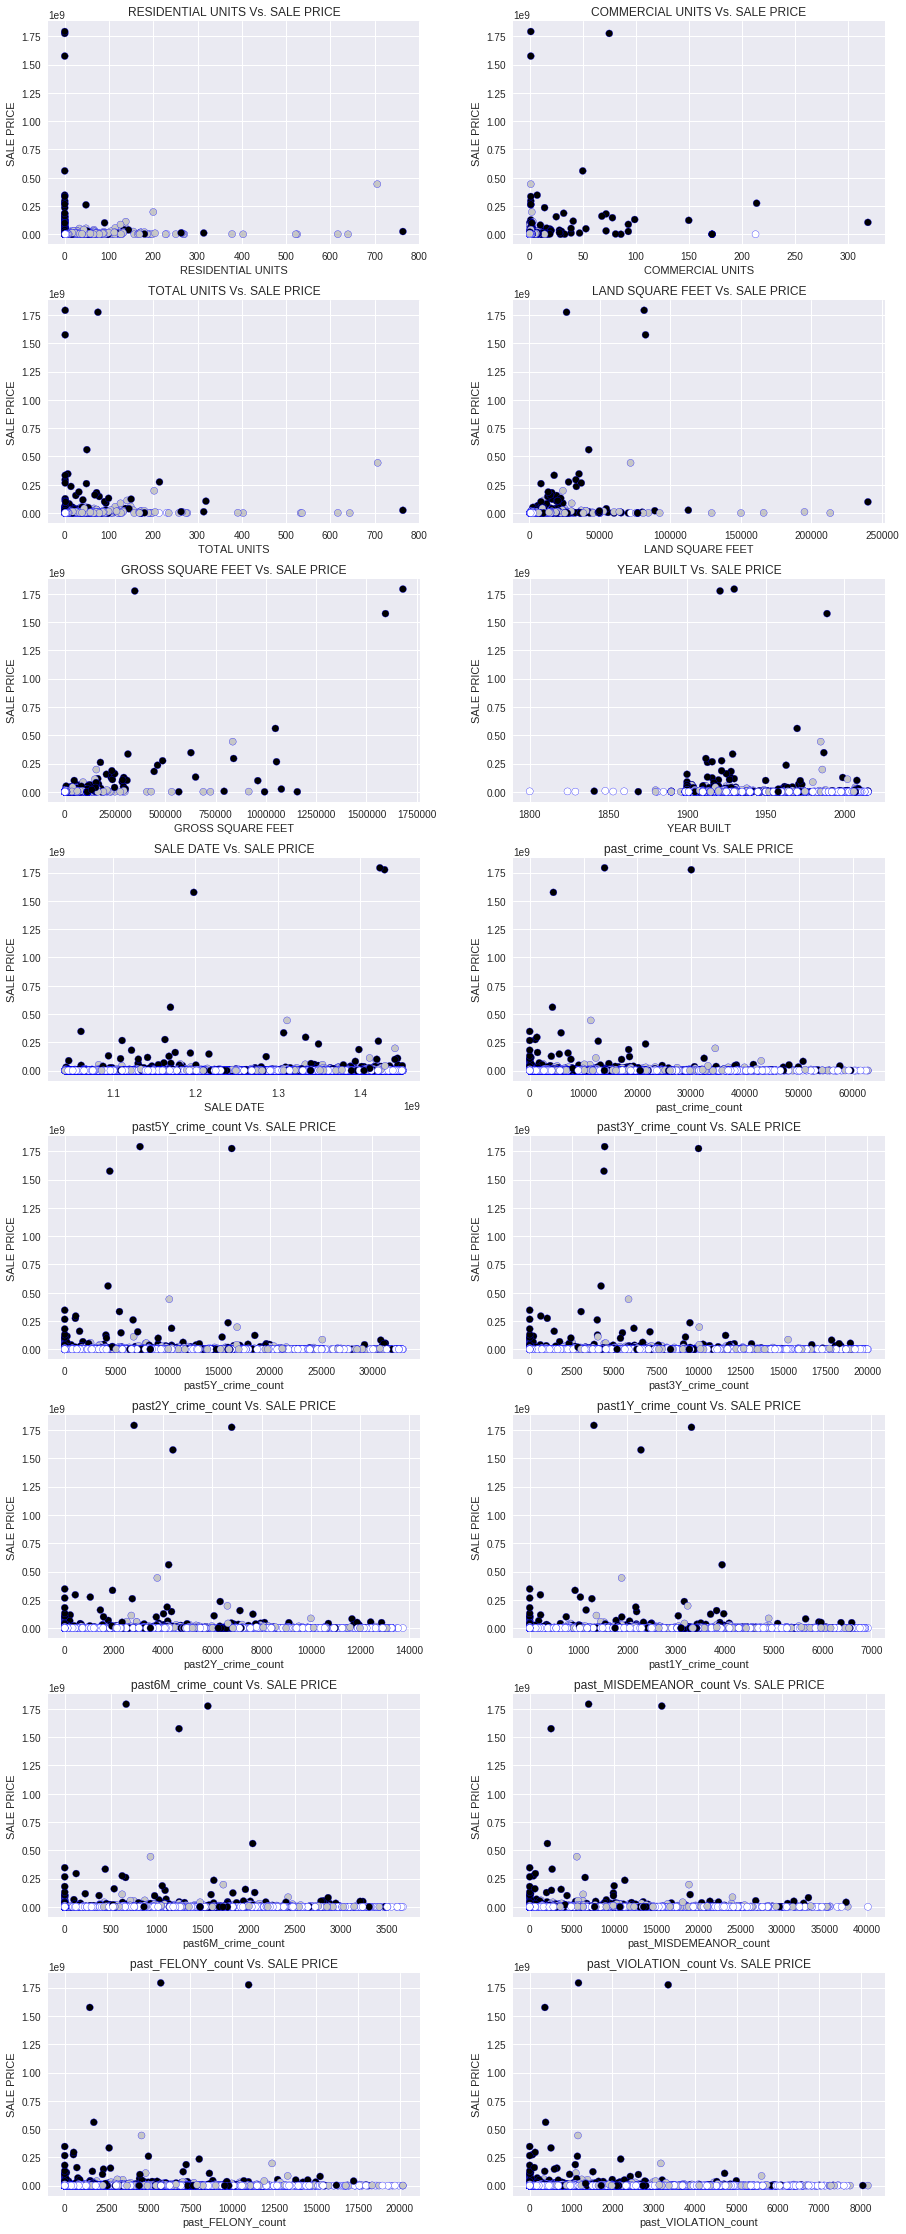

In [59]:
#Scatter Plott with all continuous variables

y = sample_data["SALE PRICE"].copy()

fig, ax = plt.subplots(8,2,figsize=(15,40))

x = sample_data["RESIDENTIAL UNITS"].copy()
ax[0,0].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[0,0].set_title("RESIDENTIAL UNITS Vs. SALE PRICE")
ax[0,0].set_xlabel("RESIDENTIAL UNITS")
ax[0,0].set_ylabel("SALE PRICE")

x = sample_data["COMMERCIAL UNITS"].copy()
ax[0,1].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[0,1].set_title("COMMERCIAL UNITS Vs. SALE PRICE")
ax[0,1].set_xlabel("COMMERCIAL UNITS")
ax[0,1].set_ylabel("SALE PRICE")

x = sample_data["TOTAL UNITS"].copy()
ax[1,0].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[1,0].set_title("TOTAL UNITS Vs. SALE PRICE")
ax[1,0].set_xlabel("TOTAL UNITS")
ax[1,0].set_ylabel("SALE PRICE")

x = sample_data["LAND SQUARE FEET"].copy()
ax[1,1].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[1,1].set_title("LAND SQUARE FEET Vs. SALE PRICE")
ax[1,1].set_xlabel("LAND SQUARE FEET")
ax[1,1].set_ylabel("SALE PRICE")

x = sample_data["GROSS SQUARE FEET"].copy()
ax[2,0].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[2,0].set_title("GROSS SQUARE FEET Vs. SALE PRICE")
ax[2,0].set_xlabel("GROSS SQUARE FEET")
ax[2,0].set_ylabel("SALE PRICE")

x = sample_data["YEAR BUILT"].copy()
ax[2,1].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[2,1].set_title("YEAR BUILT Vs. SALE PRICE")
ax[2,1].set_xlabel("YEAR BUILT")
ax[2,1].set_ylabel("SALE PRICE")

x = sample_data["SALE DATE"].copy()
ax[3,0].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[3,0].set_title("SALE DATE Vs. SALE PRICE")
ax[3,0].set_xlabel("SALE DATE")
ax[3,0].set_ylabel("SALE PRICE")

x = sample_data["past_crime_count"].copy()
ax[3,1].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[3,1].set_title("past_crime_count Vs. SALE PRICE")
ax[3,1].set_xlabel("past_crime_count")
ax[3,1].set_ylabel("SALE PRICE")

x = sample_data["past5Y_crime_count"].copy()
ax[4,0].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[4,0].set_title("past5Y_crime_count Vs. SALE PRICE")
ax[4,0].set_xlabel("past5Y_crime_count")
ax[4,0].set_ylabel("SALE PRICE")

x = sample_data["past3Y_crime_count"].copy()
ax[4,1].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[4,1].set_title("past3Y_crime_count Vs. SALE PRICE")
ax[4,1].set_xlabel("past3Y_crime_count")
ax[4,1].set_ylabel("SALE PRICE")

x = sample_data["past2Y_crime_count"].copy()
ax[5,0].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[5,0].set_title("past2Y_crime_count Vs. SALE PRICE")
ax[5,0].set_xlabel("past2Y_crime_count")
ax[5,0].set_ylabel("SALE PRICE")

x = sample_data["past1Y_crime_count"].copy()
ax[5,1].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[5,1].set_title("past1Y_crime_count Vs. SALE PRICE")
ax[5,1].set_xlabel("past1Y_crime_count")
ax[5,1].set_ylabel("SALE PRICE")

x = sample_data["past6M_crime_count"].copy()
ax[6,0].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[6,0].set_title("past6M_crime_count Vs. SALE PRICE")
ax[6,0].set_xlabel("past6M_crime_count")
ax[6,0].set_ylabel("SALE PRICE")

x = sample_data["past_MISDEMEANOR_count"].copy()
ax[6,1].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[6,1].set_title("past_MISDEMEANOR_count Vs. SALE PRICE")
ax[6,1].set_xlabel("past_MISDEMEANOR_count")
ax[6,1].set_ylabel("SALE PRICE")

x = sample_data["past_FELONY_count"].copy()
ax[7,0].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[7,0].set_title("past_FELONY_count Vs. SALE PRICE")
ax[7,0].set_xlabel("past_FELONY_count")
ax[7,0].set_ylabel("SALE PRICE")

x = sample_data["past_VIOLATION_count"].copy()
ax[7,1].scatter(x,y,c = sample_data['TAX CLASS AT TIME OF SALE'],edgecolors = 'b',alpha = 1)
ax[7,1].set_title("past_VIOLATION_count Vs. SALE PRICE")
ax[7,1].set_xlabel("past_VIOLATION_count")
ax[7,1].set_ylabel("SALE PRICE")

plt.subplots_adjust(wspace= 0.25, hspace = 0.25)
plt.show()



In [18]:
#Finding Correlation between Features Vs. Target variable(SALES-PRICE)
model_data = pd.get_dummies(sample_data[(sample_data['SALE PRICE']>=1e5) & (sample_data['SALE PRICE']<=1e7)])
print("model_data  shape:",model_data.shape)

temp_x = model_data.drop("SALE PRICE",axis = 1).copy()
temp_y = model_data["SALE PRICE"].copy()
corr = []
corr_abs = []
p_value = []
for i in range(len(temp_x.columns)):
    corr.append(st.pearsonr(temp_x.iloc[:,i],temp_y)[0])
    p_value.append(st.pearsonr(temp_x.iloc[:,i],temp_y)[1])
    corr_abs.append(abs(st.pearsonr(temp_x.iloc[:,i],temp_y)[0]))

corr = pd.DataFrame({'feature':temp_x.columns,'corr_coef':corr,'p_value':p_value,'corr_abs':corr_abs})

corr = corr.sort_values(by = ["corr_abs","p_value"],ascending = False).reset_index(drop = True)
corr_tbl = corr.loc[:,["feature","corr_coef","p_value"]].copy()
corr_tbl.to_csv("correlation_table.csv")

corr[corr.p_value <=0.05]


model_data  shape: (6877, 477)


,corr_abs,corr_coef,feature,p_value
0,0.441273,0.441273,TAX CLASS AT PRESENT_2,0.000000e+00
1,0.356373,-0.356373,BOROUGH,4.621840e-205
2,0.352383,0.352383,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR...,3.143923e-200
3,0.346786,-0.346786,TAX CLASS AT PRESENT_1,1.446802e-193
4,0.302296,0.302296,TAX CLASS AT TIME OF SALE,2.732657e-145
5,0.299599,-0.299599,ZIP CODE,1.274046e-142
6,0.290875,0.290875,BUILDING CLASS AT TIME OF SALE_D1,3.487320e-134
7,0.268134,0.268134,BUILDING CLASS AT PRESENT_D1,1.470667e-113
8,0.237777,0.237777,TOTAL UNITS,5.265820e-89
9,0.235831,0.235831,NEIGHBORHOOD_GREENWICH VILLAGE-WEST,1.522939e-87


In [20]:
#correlation of crime-data with sales-price
corr[corr.feature.str.contains('past')]

,corr_abs,corr_coef,feature,p_value
46,0.097020,0.097020,past_FELONY_count,7.432126e-16
54,0.090508,0.090508,past_MISDEMEANOR_count,5.491112e-14
58,0.088916,0.088916,past_crime_count,1.503178e-13
86,0.069498,0.069498,past5Y_crime_count,7.961938e-09
92,0.065407,0.065407,past3Y_crime_count,5.670102e-08
93,0.065208,0.065208,past2Y_crime_count,6.221884e-08
99,0.059194,0.059194,past1Y_crime_count,9.004163e-07
102,0.057543,0.057543,past_VIOLATION_count,1.797455e-06
106,0.054715,0.054715,past6M_crime_count,5.626144e-06


**Modeling & Evaluation**

model_data shape for 100K USD <= SALE PRICE <= 10M USD: (6877, 477)

Linear Regresion results:

Model Performance on Training data
Mean-Squared Error: 595814053656.5806 
Root-Mean-Squared Error: 771889.923277005 
Rsquare: 0.6792300693862764

Predictions on Test Data:
    deviation%     residuals  y_pred_train    y_train
0  -26.521538 -1.152626e+05  5.498626e+05   434600.0
1   12.429187  8.762577e+04  6.173742e+05   705000.0
2   44.776289  6.089575e+05  7.510425e+05  1360000.0
3  -13.846654 -8.654159e+04  7.115416e+05   625000.0
4    0.001767  3.214864e+00  1.819758e+05   181979.0
5   27.938762  2.690503e+05  6.939497e+05   963000.0
6  -11.923327 -6.438596e+04  6.043860e+05   540000.0
7  -37.441196 -1.419021e+06  5.209021e+06  3790000.0
8  -47.961883 -1.270990e+06  3.920990e+06  2650000.0
9   35.213647  1.250084e+05  2.299916e+05   355000.0

Model Performance on Test data
Mean-Squared Error: 1165780012302866.0 
Root-Mean-Squared Error: 34143520.79535539 
Rsquare: -659.2990051845629

Pre

/home/mahesh_yerra/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Model Performance on Training data:
Mean-Squared Error: 602620646093.4557 
Root-Mean-Squared Error: 776286.4459034795 
Rsquare: 0.675565586868127

Predictions on Training Data:
    deviation%     residuals  y_pred_train    y_train
0  -31.284650 -1.359631e+05  5.705631e+05   434600.0
1   13.488077  9.509094e+04  6.099091e+05   705000.0
2   44.630952  6.069809e+05  7.530191e+05  1360000.0
3  -13.912498 -8.695311e+04  7.119531e+05   625000.0
4  302.230630  5.499963e+05 -3.680173e+05   181979.0
5   26.261799  2.529011e+05  7.100989e+05   963000.0
6   13.894280  7.502911e+04  4.649709e+05   540000.0
7  -34.714097 -1.315664e+06  5.105664e+06  3790000.0
8  -45.470305 -1.204963e+06  3.854963e+06  2650000.0
9   25.204987  8.947770e+04  2.655223e+05   355000.0

Model Performance on Test data:
Mean-Squared Error: 985973464195.0726 
Root-Mean-Squared Error: 992961.9651301214 
Rsquare: 0.44154360970700346

Predictions on Test Data:
    deviation%     residuals   y_pred_test     y_test
0   -9.41747

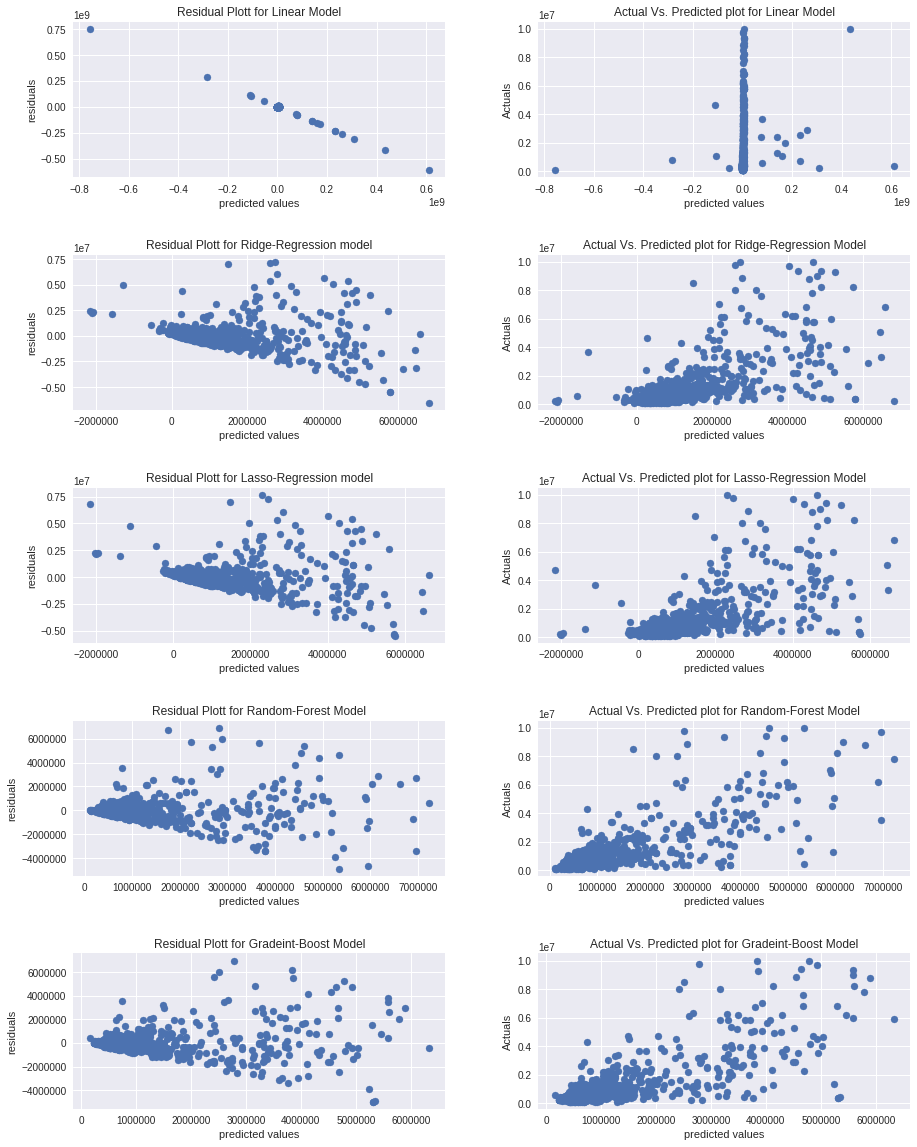



Model-Coefficients/Estimators:


Linear-Regression Model Coefficients:
 [ -1.26726025e+06  -1.38214742e+00   2.77208076e+02  -6.90876684e+02
   1.53336362e+06   1.54804236e+06  -1.54469983e+06   4.49437509e+01
   1.51148231e+00   2.48156507e+02   8.24893246e+08   2.38302816e-03
  -2.50802973e+09  -1.24730464e+02   6.48919302e+01   6.63853964e+01
  -4.87311228e+01   3.58330056e+01   2.50802979e+09   2.50802987e+09
   2.50802948e+09   1.67065813e+06  -2.10972106e+06   2.00901704e+06
   1.89118555e+06   1.68566802e+06   1.42452915e+06   2.65191494e+05
  -1.86488057e+06   3.54786956e+05  -1.69139109e+06   1.57149420e+06
  -1.65024704e+06   2.07532436e+05  -3.49074553e+05   1.23479491e+06
  -1.79704166e+06   2.82099093e+05   2.46755003e+05   7.40212043e+05
   3.20258110e+05   1.53321557e+06   6.00950645e+05  -1.58249283e+06
   2.87871216e+06   1.82277582e+05   2.05514865e+06  -1.44726244e+05
   7.64039187e+04   1.25198942e+06   2.16837297e+05   1.33143248e+06
  -1.73391071e+06   1.9814013

In [18]:
#Final
model_data = pd.get_dummies(sample_data[(sample_data['SALE PRICE']>=1e5) & (sample_data['SALE PRICE']<=1e7)])
print('model_data shape for 100K USD <= SALE PRICE <= 10M USD:',model_data.shape)

#Splitting Train & Test data
X = model_data.drop("SALE PRICE",axis = 1).values
Y = model_data["SALE PRICE"].values
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 21)

#Creating data frame for adding model performance metrics
model_perf = pd.DataFrame(columns = ['model_name','RMSE','Rsquare','Train_RMSE','Train_Rsquare'])

fig, ax = plt.subplots(5,2,figsize=(15,20))

#Running Linear model
print('\nLinear Regresion results:')
model = LinearRegression()
model.fit(x_train,y_train)
model_linear = model

y_pred_train = model.predict(x_train)
y_pred_train_mse = mean_squared_error(y_train,y_pred_train)
y_pred_train_rmse = np.sqrt(y_pred_train_mse)
train_Rsquare = model.score(x_train,y_train)

y_pred_test = model.predict(x_test)
y_pred_test_mse = mean_squared_error(y_test,y_pred_test)
y_pred_test_rmse = np.sqrt(y_pred_test_mse)
test_Rsquare = model.score(x_test,y_test)

df_pred_train = pd.DataFrame({'y_train':y_train,'y_pred_train':y_pred_train,'residuals':(y_train - y_pred_train),'deviation%':(y_train - y_pred_train)*100/y_train})
df_pred_test = pd.DataFrame({'y_test':y_test,'y_pred_test':y_pred_test,'residuals':(y_test - y_pred_test),'deviation%':(y_test - y_pred_test)*100/y_test})

print('\nModel Performance on Training data')
print("Mean-Squared Error: {} \nRoot-Mean-Squared Error: {} \nRsquare: {}".format(y_pred_train_mse,y_pred_train_rmse,train_Rsquare))
print("\nPredictions on Test Data:\n",df_pred_train.head(10))

print('\nModel Performance on Test data')
print("Mean-Squared Error: {} \nRoot-Mean-Squared Error: {} \nRsquare: {}".format(y_pred_test_mse,y_pred_test_rmse,test_Rsquare))
print("\nPredictions on Test Data:\n",df_pred_test.head(10))

#Appending Model performance metrics
model_perf = model_perf.append({'model_name':'Linear','RMSE':y_pred_test_rmse,'Rsquare':test_Rsquare,'Train_RMSE':y_pred_train_rmse,'Train_Rsquare':train_Rsquare},ignore_index = True)

#residual plot
residuals = df_pred_test['residuals'].values
fitted = y_pred_test
ax[0,0].scatter(fitted,residuals)
ax[0,0].set_title("Residual Plott for Linear Model")
ax[0,0].set_xlabel("predicted values")
ax[0,0].set_ylabel("residuals")

#Actual Vs. Predicted plot
ax[0,1].scatter(fitted,y_test)
ax[0,1].set_title("Actual Vs. Predicted plot for Linear Model")
ax[0,1].set_xlabel("predicted values")
ax[0,1].set_ylabel("Actuals")

#running Ridge-Regression

print('\n\nRidge-Regression results:')
#Tuning paramerters
param_grid = {'alpha':[0.001,0.01,0.1,1,10,100],'normalize': ["True"]}
ridge = Ridge()
model = GridSearchCV(ridge,param_grid, cv = 5)
model.fit(x_train,y_train)
print("best parameters: {}".format(model.best_params_))
params  = model.best_params_

#Running model again with best parameters:
model= Ridge(params['alpha'],params['normalize'])
model.fit(x_train, y_train)
model_ridge = model

y_pred_train = model.predict(x_train)
y_pred_train_mse = mean_squared_error(y_train,y_pred_train)
y_pred_train_rmse = np.sqrt(y_pred_train_mse)
train_Rsquare = model.score(x_train,y_train)

y_pred_test = model.predict(x_test)
y_pred_test_mse = mean_squared_error(y_test,y_pred_test)
y_pred_test_rmse = np.sqrt(y_pred_test_mse)
test_Rsquare = model.score(x_test,y_test)

df_pred_train = pd.DataFrame({'y_train':y_train,'y_pred_train':y_pred_train,'residuals':(y_train - y_pred_train),'deviation%':(y_train - y_pred_train)*100/y_train})
df_pred_test = pd.DataFrame({'y_test':y_test,'y_pred_test':y_pred_test,'residuals':(y_test - y_pred_test),'deviation%':(y_test - y_pred_test)*100/y_test})

print('\nModel Performance on Training data:')
print("Mean-Squared Error: {} \nRoot-Mean-Squared Error: {} \nRsquare: {}".format(y_pred_train_mse,y_pred_train_rmse,train_Rsquare))
print("\nPredictions on Training Data:\n",df_pred_train.head(10))

print('\nModel Performance on Test data:')
print("Mean-Squared Error: {} \nRoot-Mean-Squared Error: {} \nRsquare: {}".format(y_pred_test_mse,y_pred_test_rmse,test_Rsquare))
print("\nPredictions on Test Data:\n",df_pred_test.head(10))

#Appending Model performance metrics
model_perf = model_perf.append({'model_name':'Ridge-Regression','RMSE':y_pred_test_rmse,'Rsquare':test_Rsquare,'Train_RMSE':y_pred_train_rmse,'Train_Rsquare':train_Rsquare},ignore_index = True)

#residual plot
residuals = df_pred_test['residuals'].values
fitted = y_pred_test
ax[1,0].scatter(fitted,residuals)
ax[1,0].set_title("Residual Plott for Ridge-Regression model")
ax[1,0].set_xlabel("predicted values")
ax[1,0].set_ylabel("residuals")

#Actual Vs. Predicted plot
ax[1,1].scatter(fitted,y_test)
ax[1,1].set_title("Actual Vs. Predicted plot for Ridge-Regression Model")
ax[1,1].set_xlabel("predicted values")
ax[1,1].set_ylabel("Actuals")

#running Lasso-Regression

print('\n\nLasso-Regression results:')
#Tuning paramerters
param_grid = {'alpha':[100,200,300,400,500],'normalize': ["True"]}
lasso= Lasso()
model = GridSearchCV(lasso,param_grid, cv = 5)
model.fit(x_train,y_train)
print("\nbest parameters: {}".format(model.best_params_))
params  = model.best_params_

#Running model again with best parameters:
model= Lasso(params['alpha'],params['normalize'])
model.fit(x_train, y_train)
model_lasso = model

y_pred_train = model.predict(x_train)
y_pred_train_mse = mean_squared_error(y_train,y_pred_train)
y_pred_train_rmse = np.sqrt(y_pred_train_mse)
train_Rsquare = model.score(x_train,y_train)

y_pred_test = model.predict(x_test)
y_pred_test_mse = mean_squared_error(y_test,y_pred_test)
y_pred_test_rmse = np.sqrt(y_pred_test_mse)
test_Rsquare = model.score(x_test,y_test)

df_pred_train = pd.DataFrame({'y_train':y_train,'y_pred_train':y_pred_train,'residuals':(y_train - y_pred_train),'deviation%':(y_train - y_pred_train)*100/y_train})
df_pred_test = pd.DataFrame({'y_test':y_test,'y_pred_test':y_pred_test,'residuals':(y_test - y_pred_test),'deviation%':(y_test - y_pred_test)*100/y_test})

print('\nModel Performance on Training data:')
print("Mean-Squared Error: {} \nRoot-Mean-Squared Error: {} \nRsquare: {}".format(y_pred_train_mse,y_pred_train_rmse,train_Rsquare))
print("\nPredictions on Training Data:\n",df_pred_train.head(10))

print('\nModel Performance on Test data:')
print("Mean-Squared Error: {} \nRoot-Mean-Squared Error: {} \nRsquare: {}".format(y_pred_test_mse,y_pred_test_rmse,test_Rsquare))
print("\nPredictions on Test Data:\n",df_pred_test.head(10))

#Appending Model performance metrics
model_perf = model_perf.append({'model_name':'Lasso-Regression','RMSE':y_pred_test_rmse,'Rsquare':test_Rsquare,'Train_RMSE':y_pred_train_rmse,'Train_Rsquare':train_Rsquare},ignore_index = True)

#residual plot
residuals = df_pred_test['residuals'].values
fitted = y_pred_test
ax[2,0].scatter(fitted,residuals)
ax[2,0].set_title("Residual Plott for Lasso-Regression model")
ax[2,0].set_xlabel("predicted values")
ax[2,0].set_ylabel("residuals")

#Actual Vs. Predicted plot
ax[2,1].scatter(fitted,y_test)
ax[2,1].set_title("Actual Vs. Predicted plot for Lasso-Regression Model")
ax[2,1].set_xlabel("predicted values")
ax[2,1].set_ylabel("Actuals")

#running RandomForest regressor

print('\n\nRandom-Forest results:')
model = RandomForestRegressor(n_estimators = 100)
model.fit(x_train,y_train)

model_rf = model

y_pred_train = model.predict(x_train)
y_pred_train_mse = mean_squared_error(y_train,y_pred_train)
y_pred_train_rmse = np.sqrt(y_pred_train_mse)
train_Rsquare = model.score(x_train,y_train)

y_pred_test = model.predict(x_test)
y_pred_test_mse = mean_squared_error(y_test,y_pred_test)
y_pred_test_rmse = np.sqrt(y_pred_test_mse)
test_Rsquare = model.score(x_test,y_test)

df_pred_train = pd.DataFrame({'y_train':y_train,'y_pred_train':y_pred_train,'residuals':(y_train - y_pred_train),'deviation%':(y_train - y_pred_train)*100/y_train})
df_pred_test = pd.DataFrame({'y_test':y_test,'y_pred_test':y_pred_test,'residuals':(y_test - y_pred_test),'deviation%':(y_test - y_pred_test)*100/y_test})

print('\nModel Performance on Training data:')
print("Mean-Squared Error: {} \nRoot-Mean-Squared Error: {} \nRsquare: {}".format(y_pred_train_mse,y_pred_train_rmse,train_Rsquare))
print("\nPredictions on Training Data:\n",df_pred_train.head(10))

print('\nModel Performance on Test data:')
print("Mean-Squared Error: {} \nRoot-Mean-Squared Error: {} \nRsquare: {}".format(y_pred_test_mse,y_pred_test_rmse,test_Rsquare))
print("\nPredictions on Test Data:\n",df_pred_test.head(10))

#Appending Model performance metrics
model_perf = model_perf.append({'model_name':'Random-Forest','RMSE':y_pred_test_rmse,'Rsquare':test_Rsquare,'Train_RMSE':y_pred_train_rmse,'Train_Rsquare':train_Rsquare},ignore_index = True)

#residual plot
residuals = df_pred_test['residuals'].values
fitted = y_pred_test
ax[3,0].scatter(fitted,residuals)
ax[3,0].set_title("Residual Plott for Random-Forest Model")
ax[3,0].set_xlabel("predicted values")
ax[3,0].set_ylabel("residuals")

#Actual Vs. Predicted plot
ax[3,1].scatter(fitted,y_test)
ax[3,1].set_title("Actual Vs. Predicted plot for Random-Forest Model")
ax[3,1].set_xlabel("predicted values")
ax[3,1].set_ylabel("Actuals")


#running Gradient-Boost regressor:

print('\n\nGradient-Boost  results:')
model = GradientBoostingRegressor()
model.fit(x_train,y_train)
model_gb = model

y_pred_train = model.predict(x_train)
y_pred_train_mse = mean_squared_error(y_train,y_pred_train)
y_pred_train_rmse = np.sqrt(y_pred_train_mse)
train_Rsquare = model.score(x_train,y_train)

y_pred_test = model.predict(x_test)
y_pred_test_mse = mean_squared_error(y_test,y_pred_test)
y_pred_test_rmse = np.sqrt(y_pred_test_mse)
test_Rsquare = model.score(x_test,y_test)

df_pred_train = pd.DataFrame({'y_train':y_train,'y_pred_train':y_pred_train,'residuals':(y_train - y_pred_train),'deviation%':(y_train - y_pred_train)*100/y_train})
df_pred_test = pd.DataFrame({'y_test':y_test,'y_pred_test':y_pred_test,'residuals':(y_test - y_pred_test),'deviation%':(y_test - y_pred_test)*100/y_test})


print('\nModel Performance on Training data:')
print("Mean-Squared Error: {} \nRoot-Mean-Squared Error: {} \nRsquare: {}".format(y_pred_train_mse,y_pred_train_rmse,train_Rsquare))
print("\nPredictions on Training Data:\n",df_pred_train.head(10))

print('\nModel Performance on Test data:')
print("Mean-Squared Error: {} \nRoot-Mean-Squared Error: {} \nRsquare: {}".format(y_pred_test_mse,y_pred_test_rmse,test_Rsquare))
print("\nPredictions on Test Data:\n",df_pred_test.head(10))

#Appending Model performance metrics
model_perf = model_perf.append({'model_name':'Gradient-Boost','RMSE':y_pred_test_rmse,'Rsquare':test_Rsquare,'Train_RMSE':y_pred_train_rmse,'Train_Rsquare':train_Rsquare},ignore_index = True)

#residual plot
residuals = df_pred_test['residuals'].values
fitted = y_pred_test
ax[4,0].scatter(fitted,residuals)
ax[4,0].set_title("Residual Plott for Gradeint-Boost Model")
ax[4,0].set_xlabel("predicted values")
ax[4,0].set_ylabel("residuals")

#Actual Vs. Predicted plot
ax[4,1].scatter(fitted,y_test)
ax[4,1].set_title("Actual Vs. Predicted plot for Gradeint-Boost Model")
ax[4,1].set_xlabel("predicted values")
ax[4,1].set_ylabel("Actuals")


print('\n\nModel-Performance Table:\n',model_perf)
plt.subplots_adjust(wspace= 0.25, hspace = 0.5)
plt.show()
print('\n\nModel-Coefficients/Estimators:\n')
print('\nLinear-Regression Model Coefficients:\n',model_linear.coef_)
print('\nRidge-Regression Model Coefficients:\n',model_ridge.coef_)
print('\nLasso-Regression Model Coefficients:\n',model_lasso.coef_)
print('\nRandom Forest-Model estimators:\n',model_rf.estimators_)
print('\nRandom Forest-Model Feature-Importances:\n',model_rf.feature_importances_)
print('\nGradient Boost-Model estimators:\n',model_gb.estimators_)
print('\nGradient Boost-Model Feature-Importances:\n',model_gb.feature_importances_)